In [2]:

import numpy as np
import matplotlib.pyplot as plt

In [3]:
#@title Import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt

rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [4]:
#@title Data loading
import numpy as np
fname = []

for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)


alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

In [5]:
def visualize_components(component1, component2, labels, show=True):
  """
  Plots a 2D representation of the data for visualization with categories
  labelled as different colors.

  Args:
    component1 (numpy array of floats) : Vector of component 1 scores
    component2 (numpy array of floats) : Vector of component 2 scores
    labels (numpy array of floats)     : Vector corresponding to categories of
                                         samples

  Returns:
    Nothing.

  """

  plt.figure()
  cmap = plt.cm.get_cmap('tab10')
  plt.scatter(x=component1, y=component2, c=labels, cmap=cmap)
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.colorbar(ticks=range(3))
  plt.clim(-0.5, 9.5)
  if show:
    plt.show()

In [6]:
def get_variance_explained(evals):
  """
  Calculates variance explained from the eigenvalues.

  Args:
    evals (numpy array of floats) : Vector of eigenvalues

  Returns:
    (numpy array of floats)       : Vector of variance explained

  """

  #################################################
  ## TO DO for students: calculate the explained variance using the equation
  ## from Section 2.
  # Comment once you've filled in the function
  # raise NotImplementedError("Student excercise: calculate explaine variance!")
  #################################################

  # Cumulatively sum the eigenvalues
  csum = np.cumsum(evals)

  # Normalize by the sum of eigenvalues
  variance_explained = csum/np.sum(evals)

  return variance_explained

### Get trials and get separate neuron groups

In [7]:
def get_trials_mv_rtl(dat):
    ind=(dat['response'][:]==-1)
    left_act=dat['spks'][:,ind]
    return left_act


def get_trials_mv_ltr(dat):
    ind=(dat['response'][:]==1)
    left_act=dat['spks'][:,ind]
    return left_act
     
def get_trials_nogo(dat):
    ind=(dat['response'][:]==0)
    left_act=dat['spks'][:,ind]
    return left_act   

In [8]:
def get_areas(dat, brain_groups_vec):
        """
        gets a data dictionary from the session and returns the dictioary of the data keyed by the brain area
        
        """
        area=dict()
        
        for brain_area in brain_groups_vec:
            area_data=dict()
            area_data=get_brain_grp(dat, brain_area)   
            
            if area_data['count']!=0:
                area_data['spks_mean']=area_data['spks'].mean(axis=0)*area_data['dt']
                area_data['Stacked_Spiking']=get_stacked_output_vec(area_data['spks_mean'])
                area[brain_area]=area_data
                
        return area

In [9]:
dat=alldat[0]
dat['spks'].shape

(734, 214, 250)

In [10]:
left_data=get_trials_mv_rtl(dat)

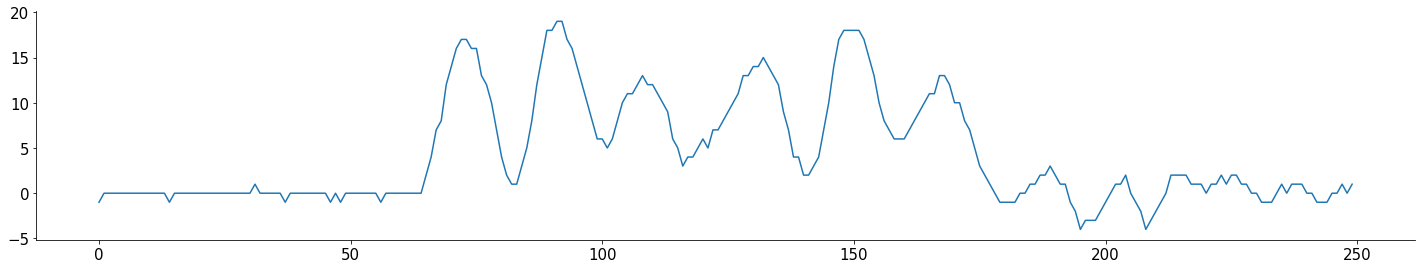

In [11]:
left_data.shape
plt.plot(dat['wheel'][0,0])
plt.show()

In [12]:
right_data=get_trials_mv_ltr(dat)

In [13]:
right_data.shape

(734, 71, 250)

In [14]:
dat=alldat[0]
print(dat['response']," : ",np.sum(dat['response']) )
print(dat['feedback_type'])
print(dat['contrast_right'])
print(dat['contrast_left'])
print(get_trials_nogo(dat).shape)

[ 1. -1.  1.  0.  1.  1. -1. -1.  0.  1.  1.  0.  1.  1.  1. -1.  0. -1.
 -1. -1.  0.  1.  1.  0.  1.  1.  0. -1.  1. -1. -1.  0. -1.  1. -1.  0.
  0. -1. -1.  1.  1. -1. -1. -1.  0. -1. -1.  1. -1.  1. -1. -1.  0.  1.
  1. -1. -1. -1. -1. -1. -1. -1.  0. -1.  1. -1. -1.  0. -1.  0.  1. -1.
  1. -1. -1.  1. -1. -1. -1.  0.  0.  1. -1. -1.  1.  0.  0.  1. -1.  1.
  1.  1.  1.  0. -1.  1. -1.  0.  1.  0. -1.  1. -1.  0. -1.  0. -1.  0.
 -1.  0.  0.  0.  0.  0. -1.  0.  1.  1.  0.  1.  0.  1. -1.  1. -1.  1.
 -1. -1.  1.  0. -1.  0. -1. -1. -1.  0.  0.  1.  0. -1.  1. -1. -1.  1.
 -1.  0.  0.  1.  0.  1.  1.  0.  1. -1.  0. -1.  1. -1.  0.  0.  0.  1.
  1.  0. -1.  1.  1.  1.  0.  0.  0.  0.  1.  0.  0. -1.  1.  1.  1.  0.
  0.  1.  0.  0.  0. -1.  0. -1.  0.  1.  1.  0.  0.  1.  0.  0.  0.  1.
  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  1.  1.  1.  0.  0.  1.]  :  2.0
[ 1.  1.  1.  1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
 -1. -1.  1. -1. -1.  1.  1. -1.  1.  1.  1.  1.  

In [15]:
no_go=get_trials_nogo(dat)
labels=[]

In [16]:

stack=(np.concatenate([left_data.mean(axis=0), right_data.mean(axis=0), no_go.mean(axis=0)], axis=0))
stack=stack*dat['bin_size']
labels=[1]*left_data.shape[1]+[2]*right_data.shape[1]+[0]*no_go.shape[1]

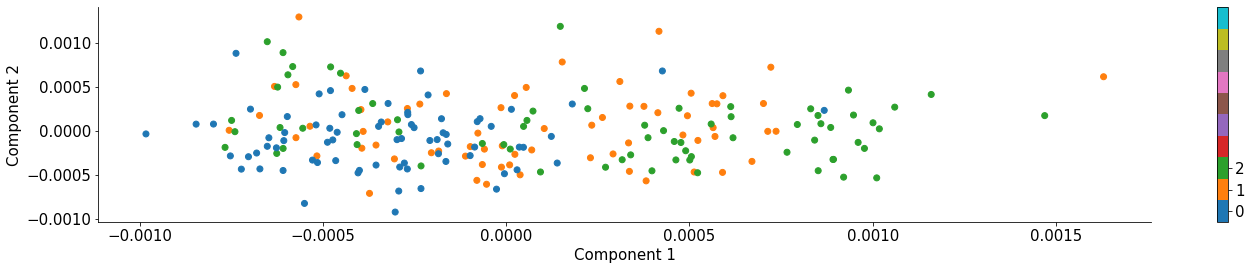

In [17]:
from sklearn.decomposition import PCA

# Initializes PCA
pca_model = PCA(n_components=2)

# Performs PCA
pca_model.fit(stack)
scores = pca_model.transform(stack)
visualize_components(scores[:,0],scores[:,1], labels)


findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


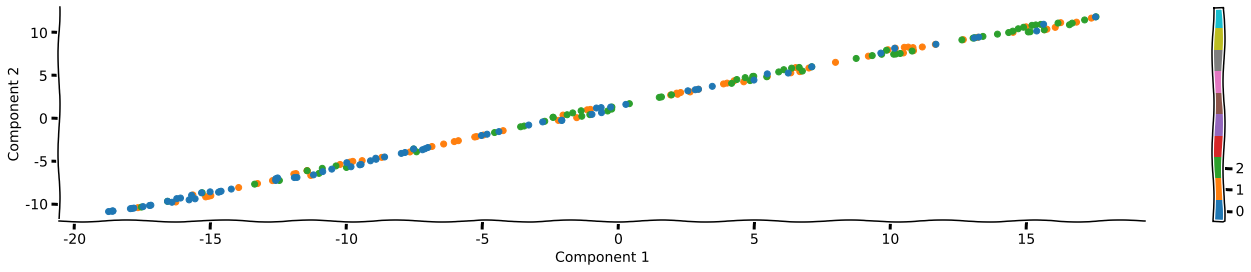

In [18]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, perplexity=30)
embed = tsne_model.fit_transform(stack.sum(axis=1).reshape(-1,1))

# Visualize the data
with plt.xkcd():
  visualize_components(embed[:, 0], embed[:, 1], labels)